In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os
for dirname, _, filenames in os.walk('/kaggle/input/personal-key-indicators-of-heart-disease'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv


In [3]:
data=pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv')
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [5]:
df = pd.DataFrame(data)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [21]:
df= data[['Smoking','SleepTime','PhysicalHealth','MentalHealth','Asthma','HeartDisease','BMI']]
df

,Smoking,SleepTime,PhysicalHealth,MentalHealth,Asthma,HeartDisease,BMI
0,Yes,5.0,3.0,30.0,Yes,No,16.60
1,No,7.0,0.0,0.0,No,No,20.34
2,Yes,8.0,20.0,30.0,Yes,No,26.58
3,No,6.0,0.0,0.0,No,No,24.21
4,No,8.0,28.0,0.0,No,No,23.71
...,...,...,...,...,...,...,...
319790,Yes,6.0,7.0,0.0,Yes,Yes,27.41
319791,Yes,5.0,0.0,0.0,Yes,No,29.84
319792,No,6.0,0.0,0.0,No,No,24.24
319793,No,12.0,0.0,0.0,No,No,32.81


<function matplotlib.pyplot.show(close=None, block=None)>

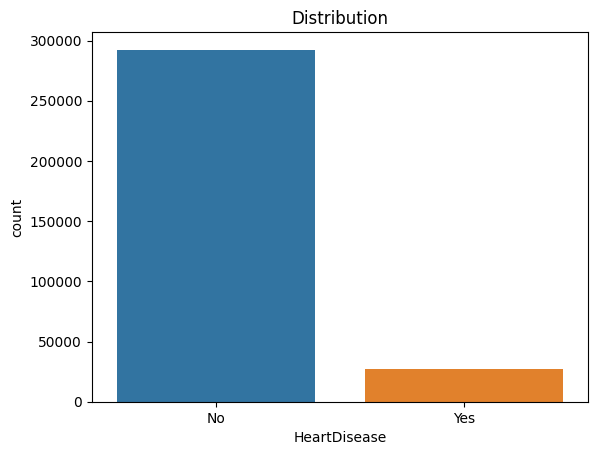

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="HeartDisease", data=df)
plt.title("Distribution")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

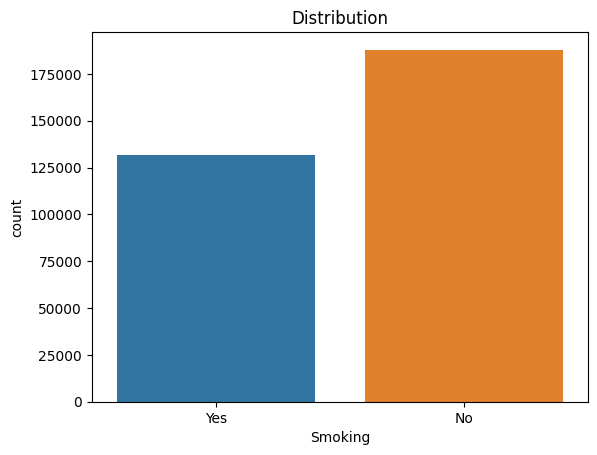

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Smoking", data=df)
plt.title("Distribution")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

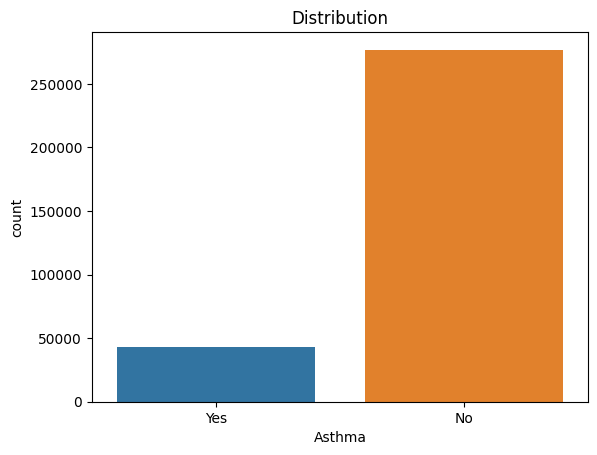

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Asthma", data=df)
plt.title("Distribution")
plt.show

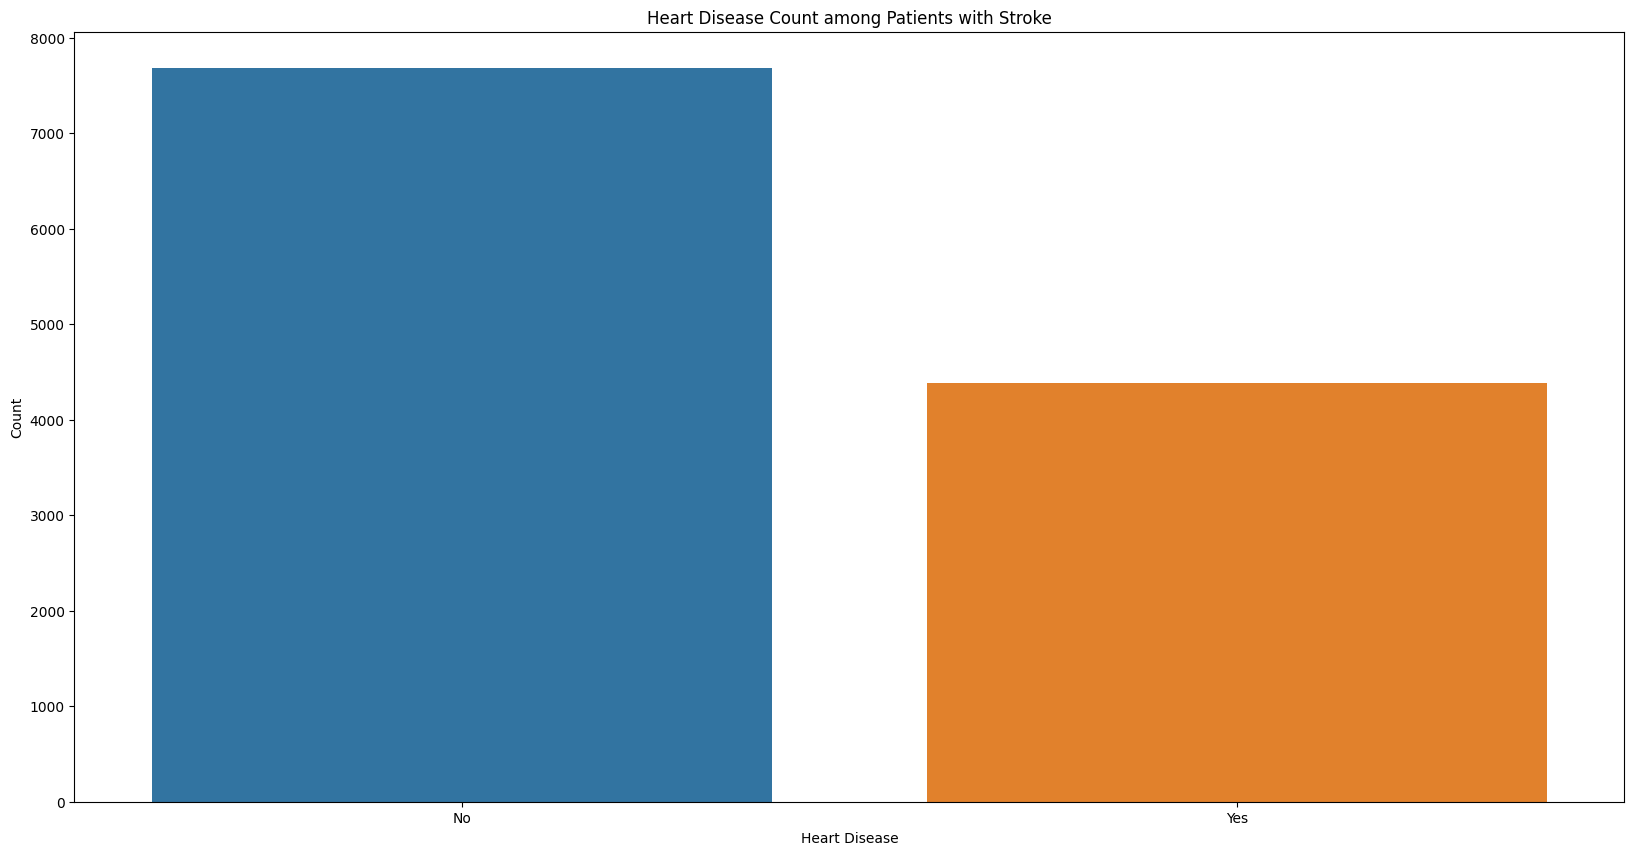

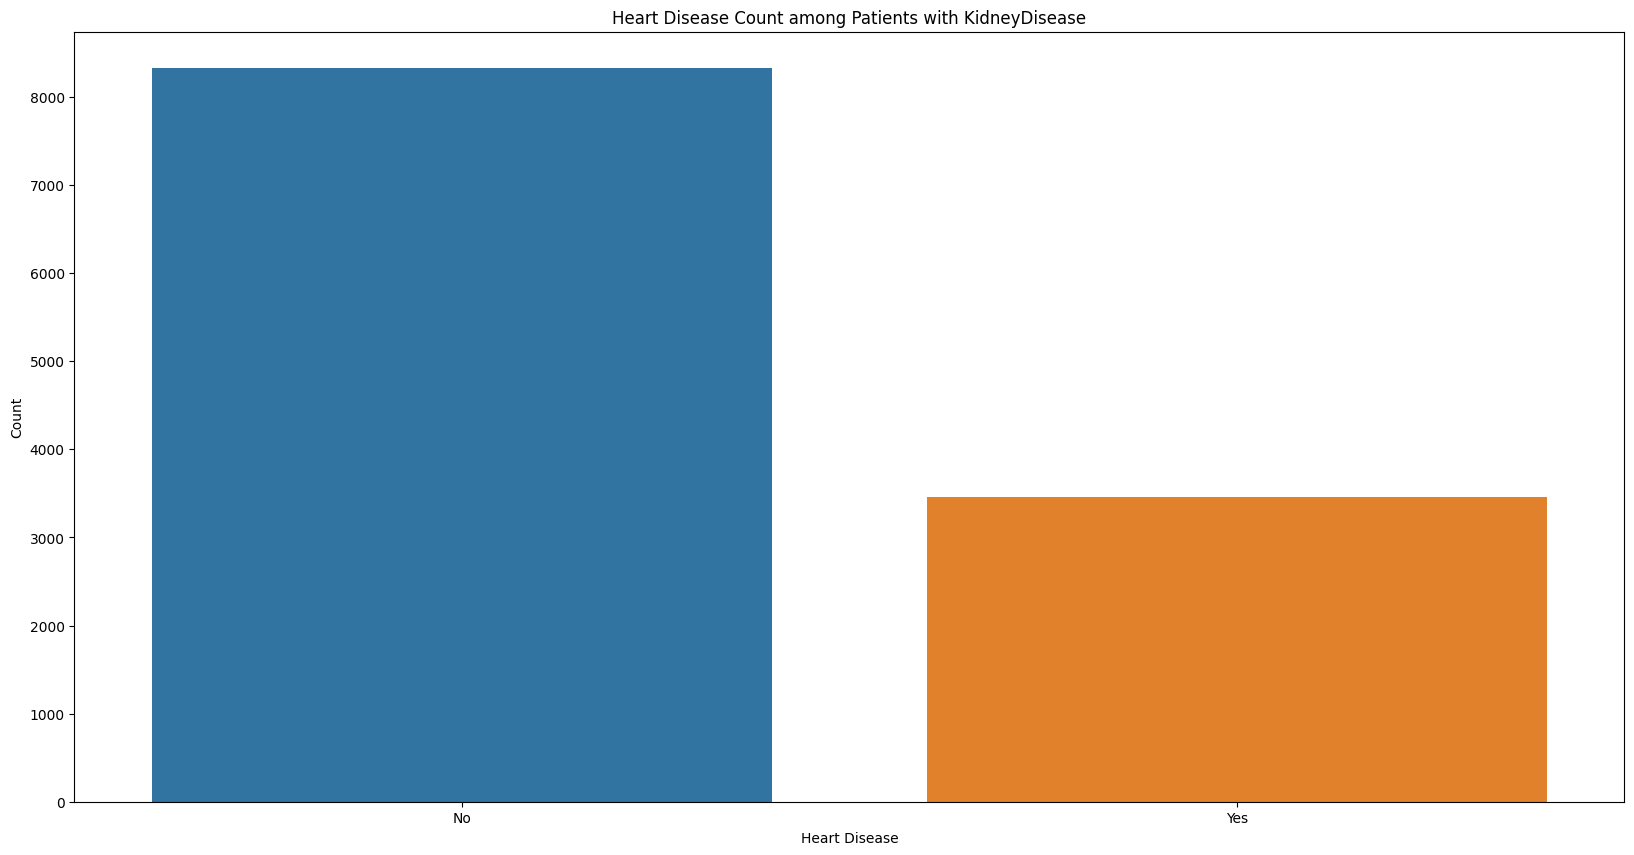

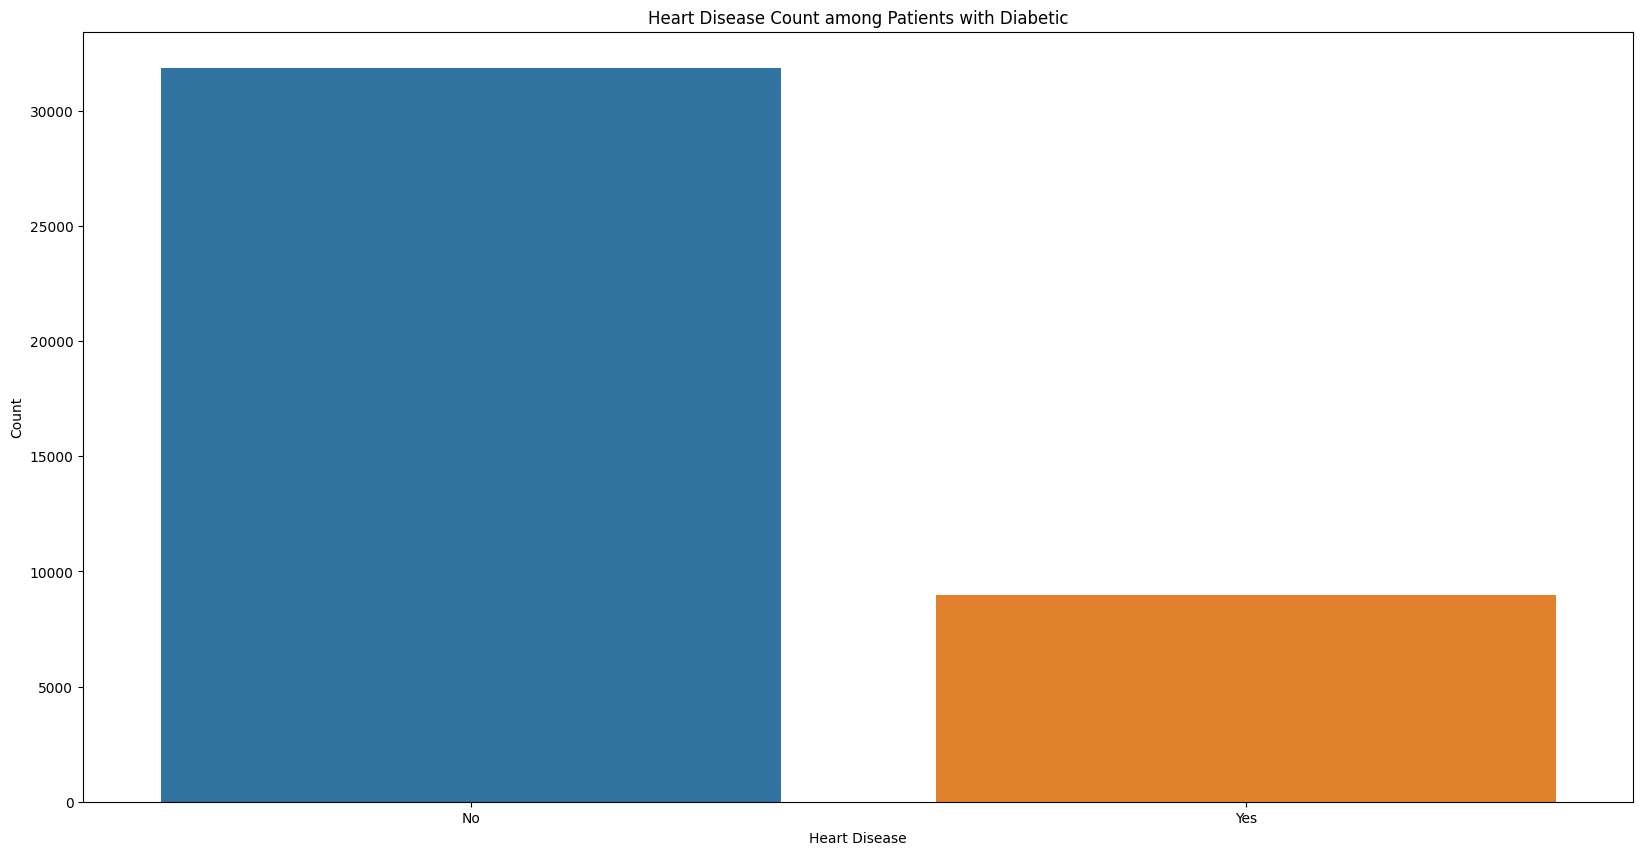

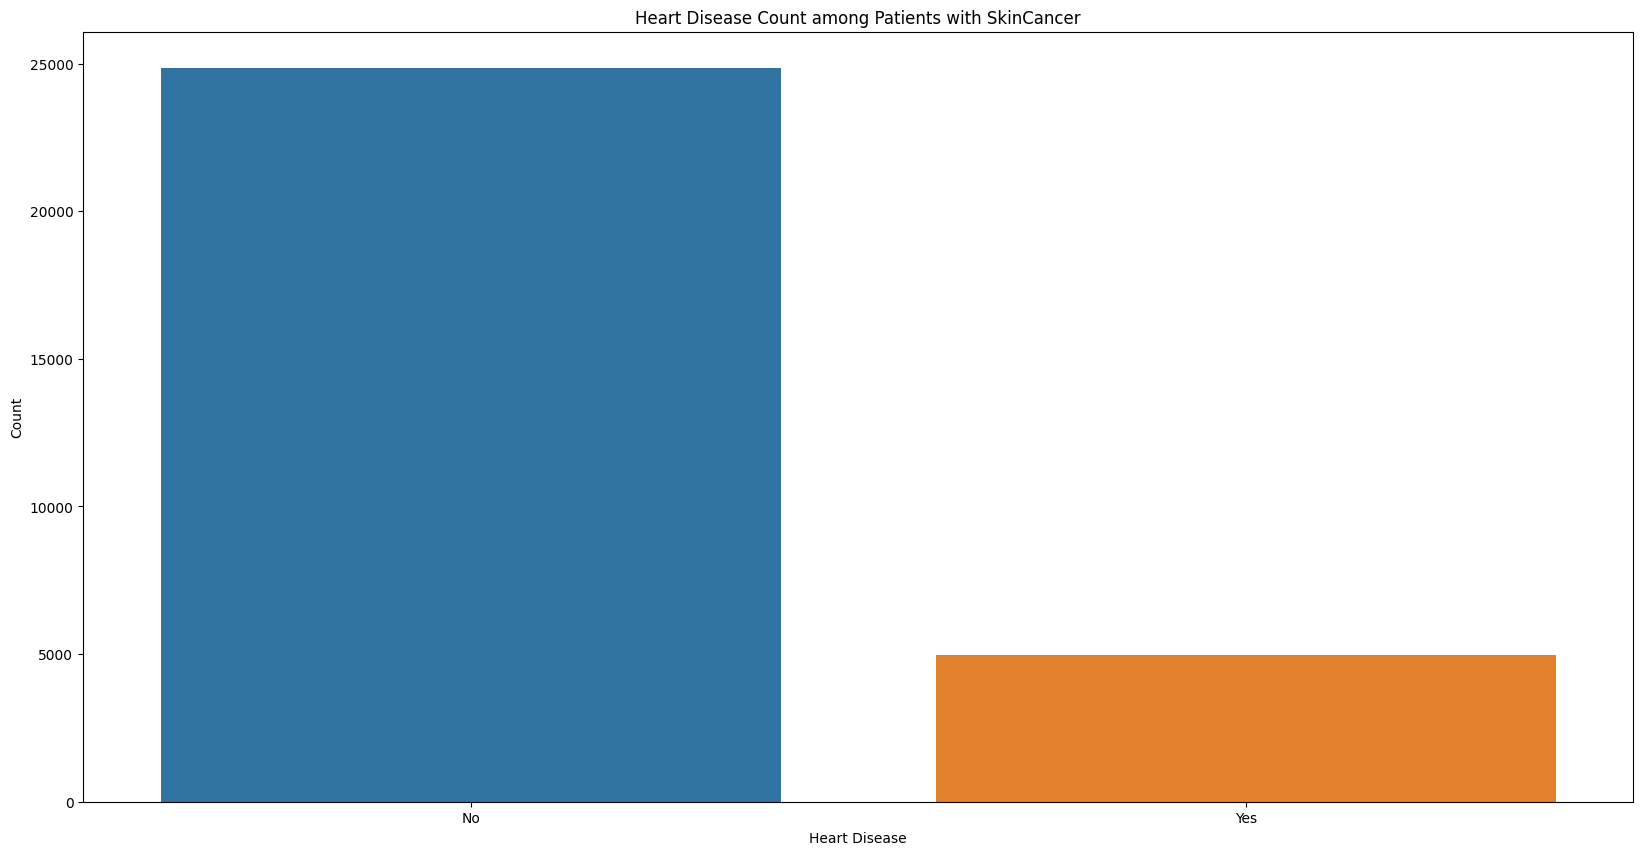

In [11]:
disease=['Stroke','KidneyDisease','Diabetic','SkinCancer']
for d in disease:
    df_filtered = df[df[d] == 'Yes']
    
    if not df_filtered.empty:
        plt.figure(figsize=(20,10))
        sns.countplot(x='HeartDisease', data=df_filtered)
        plt.title(f'Heart Disease Count among Patients with {d}')
        plt.xlabel('Heart Disease')
        plt.ylabel('Count')
        plt.show()

In [22]:
df=df.sample(1000)
df

,Smoking,SleepTime,PhysicalHealth,MentalHealth,Asthma,HeartDisease,BMI
123885,No,7.0,7.0,3.0,No,No,25.10
222518,Yes,8.0,1.0,3.0,No,No,23.71
13648,No,8.0,0.0,0.0,No,No,20.34
141406,No,7.0,0.0,0.0,No,No,25.84
91264,No,6.0,0.0,0.0,No,No,27.80
...,...,...,...,...,...,...,...
233051,No,7.0,0.0,0.0,No,No,29.76
243339,Yes,9.0,0.0,0.0,No,No,33.66
311424,No,9.0,0.0,2.0,No,No,17.85
69605,No,7.0,0.0,0.0,No,No,27.07


In [23]:
df[['Smoking','Asthma','HeartDisease']] = df[['Smoking','Asthma','HeartDisease']].replace({'Yes': 1, 'No': 0})
df

/tmp/ipykernel_33/3055342656.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Smoking','Asthma','HeartDisease']] = df[['Smoking','Asthma','HeartDisease']].replace({'Yes': 1, 'No': 0})


,Smoking,SleepTime,PhysicalHealth,MentalHealth,Asthma,HeartDisease,BMI
123885,0,7.0,7.0,3.0,0,0,25.10
222518,1,8.0,1.0,3.0,0,0,23.71
13648,0,8.0,0.0,0.0,0,0,20.34
141406,0,7.0,0.0,0.0,0,0,25.84
91264,0,6.0,0.0,0.0,0,0,27.80
...,...,...,...,...,...,...,...
233051,0,7.0,0.0,0.0,0,0,29.76
243339,1,9.0,0.0,0.0,0,0,33.66
311424,0,9.0,0.0,2.0,0,0,17.85
69605,0,7.0,0.0,0.0,0,0,27.07


In [24]:
df.columns

Index(['Smoking', 'SleepTime', 'PhysicalHealth', 'MentalHealth', 'Asthma',
       'HeartDisease', 'BMI'],
      dtype='object')

In [25]:
df.describe()

,Smoking,SleepTime,PhysicalHealth,MentalHealth,Asthma,HeartDisease,BMI
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.391000,7.055000,3.03300,3.938000,0.137000,0.085000,28.243150
std,0.488219,1.443627,7.55864,8.052888,0.344019,0.279021,6.569672
min,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,13.950000
25%,0.000000,6.000000,0.00000,0.000000,0.000000,0.000000,23.747500
50%,0.000000,7.000000,0.00000,0.000000,0.000000,0.000000,27.065000
75%,1.000000,8.000000,1.00000,3.000000,0.000000,0.000000,31.570000
max,1.000000,16.000000,30.00000,30.000000,1.000000,1.000000,62.000000


In [26]:
X=df[['Smoking','SleepTime','PhysicalHealth','MentalHealth','Asthma','BMI']]
y=df[['HeartDisease']]

In [27]:
X

,Smoking,SleepTime,PhysicalHealth,MentalHealth,Asthma,BMI
123885,0,7.0,7.0,3.0,0,25.10
222518,1,8.0,1.0,3.0,0,23.71
13648,0,8.0,0.0,0.0,0,20.34
141406,0,7.0,0.0,0.0,0,25.84
91264,0,6.0,0.0,0.0,0,27.80
...,...,...,...,...,...,...
233051,0,7.0,0.0,0.0,0,29.76
243339,1,9.0,0.0,0.0,0,33.66
311424,0,9.0,0.0,2.0,0,17.85
69605,0,7.0,0.0,0.0,0,27.07


In [28]:
y

,HeartDisease
123885,0
222518,0
13648,0
141406,0
91264,0
...,...
233051,0
243339,0
311424,0
69605,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.91
Confusion Matrix:
[[182   0]
 [ 18   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       182
           1       0.00      0.00      0.00        18

    accuracy                           0.91       200
   macro avg       0.46      0.50      0.48       200
weighted avg       0.83      0.91      0.87       200



In [35]:
new_data = {
'Smoking':[1],
'SleepTime':[6.0],
'PhysicalHealth':[28.0],
'MentalHealth':[34.0],
'Asthma':[1],
'BMI':[39.87],
}

new_df = pd.DataFrame(new_data)
predictions = model.predict(new_df)
print(f'Predictions for the new data: {predictions}')

Predictions for the new data: [0]
